In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
import torchvision
from matplotlib import pyplot as plt
from utils import plot_image, plot_curve, one_hot

# step 1.load dataset加载数据集
train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('mnist_data', train=True, download=True
, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,),(0.3081,))])), batch_size=1, shuffle=True)

test_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('mnist_data/', train=False, download=False, transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,),(0.3081,))])), batch_size=1, shuffle=False)

x, y = next(iter(train_loader))
print(x.shape, y.shape, x.min(), x.max())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.54MB/s]


Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 136kB/s]


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.97MB/s]


Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw

torch.Size([1, 1, 28, 28]) torch.Size([1]) tensor(-0.4242) tensor(2.8215)


# Creating the dataset and image transforms

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()

        self.fc1 = nn.Linear(28 * 28, 256)
        # self.fc4 = nn.Linear(256, 256)
        # self.fc5 = nn.Linear(256, 256)
        # self.fc6 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        # x = F.relu(self.fc4(x))
        # x = F.relu(self.fc5(x))
        # x = F.relu(self.fc6(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

# 进行网络的初始化
net = Net().to("cuda")

params = list(net.parameters())
flat_params = torch.cat([param.view(-1) for param in params])
len(flat_params)

218058

In [8]:
# 定义优化器
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
# 初始化数组存储loss数值便于绘图
train_loss =[]

# 对数据集迭代
criterion = nn.CrossEntropyLoss()
epochs = 1
for epoch in range(epochs):
    # 对batch迭代
    for batch_idx, (x, y) in enumerate(train_loader):
      if batch_idx > 1e4: break
      # x:[b,1,28,28],y:[512]
      # [b, 784]
      x = x.view(x.size(0), 28*28).to("cuda")
      # [b, 10]
      out = net(x)
      y_onehot = one_hot(y).to("cuda")
      # loss=mse(out, y_onehot) 计算loss数值
      # loss = F.mse_loss(out, y_onehot)
      loss = criterion(out, y_onehot)
      # 将梯度置零操作
      optimizer.zero_grad()
      # 反向传播
      loss.backward()
      # 更新权重值
      optimizer.step()
      # 累加loss值
      train_loss.append(loss.item())
      # 每十个batch进行loss值打印
      if batch_idx % 10 ==0:
          print(epoch, batch_idx, loss.item())

0 0 0.0019290901254862547
0 10 0.0005235493299551308
0 20 0.0025409336667507887
0 30 0.0008183944155462086
0 40 0.001745130866765976
0 50 7.488776683807373
0 60 0.10400330275297165
0 70 9.781293869018555
0 80 7.5284576416015625
0 90 0.8622056245803833
0 100 7.152555099310121e-07
0 110 81.99832153320312
0 120 6.967573165893555
0 130 2.4228007793426514
0 140 9.001433372497559
0 150 2.008734703063965
0 160 2.602081298828125
0 170 2.1860198974609375
0 180 2.366745948791504
0 190 2.3918890953063965
0 200 1.8149205446243286
0 210 2.199799060821533
0 220 2.498640537261963
0 230 2.0489442348480225
0 240 2.1748948097229004
0 250 2.578261137008667
0 260 2.4796085357666016
0 270 1.7840863466262817
0 280 2.152557134628296
0 290 1.653250813484192
0 300 2.737323760986328
0 310 2.1970443725585938
0 320 2.464430093765259
0 330 2.2895514965057373
0 340 2.5801806449890137
0 350 2.078505754470825
0 360 2.5410470962524414
0 370 2.232340097427368
0 380 2.3920376300811768
0 390 2.3625383377075195
0 400 1.85

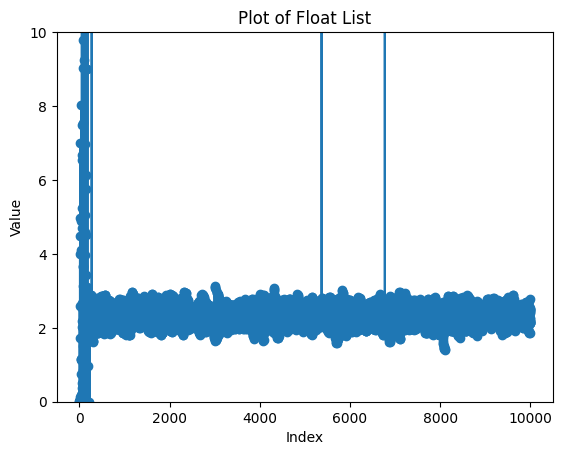

In [9]:
# 获取索引
indices = list(range(len(train_loss)))

# 绘制数据
# for i in range(len(loss_lists)):
plt.plot(indices, train_loss, marker='o')

# 添加标题和标签
plt.title('Plot of Float List')
plt.ylim(0, 10)
plt.xlabel('Index')
plt.ylabel('Value')

# 显示图形
plt.show()
# CROSS SGD

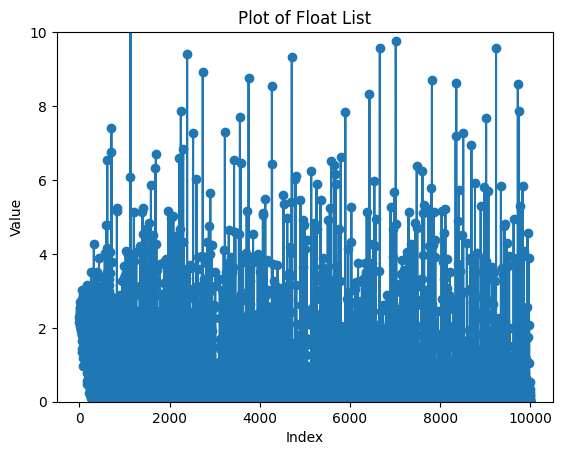

In [7]:
# 获取索引
indices = list(range(len(train_loss)))

# 绘制数据
# for i in range(len(loss_lists)):
plt.plot(indices, train_loss, marker='o')

# 添加标题和标签
plt.title('Plot of Float List')
plt.ylim(0, 10)
plt.xlabel('Index')
plt.ylabel('Value')

# 显示图形
plt.show()
# CROSS SGD

In [3]:
train_loss =[]
ep = 0.00005
# ep = 0.00002
a = 0.00005
# a = 0.008
v_mean, v_std = 0, 1
# 对数据集迭代
criterion = nn.CrossEntropyLoss()
epochs = 1
for epoch in range(epochs):
    # 对batch迭代
    for batch_idx, (x, y) in enumerate(train_loader):
      # if batch_idx > 1e4: break
      vs = torch.normal(v_mean, v_std, size=(len(flat_params), )).to("cuda")
      offset = 0
      for param in params:
          size = param.numel()  # 获取参数的元素数量
          param.data.copy_(flat_params[offset:offset+size].view(param.size()) + a * torch.sin(vs[offset:offset+size].view(param.size())))
          offset += size
      # x:[b,1,28,28],y:[512]
      # [b, 784]
      x = x.view(x.size(0), 28*28).to("cuda")
      # [b, 10]
      out = net(x)
      y_onehot = one_hot(y).to("cuda")
      # loss=mse(out, y_onehot) 计算loss数值
      # loss = F.mse_loss(out, y_onehot)
      loss = criterion(out, y_onehot)
      # 将梯度置零操作
      # optimizer.zero_grad()
      # 反向传播
      # loss.backward()
      # 更新权重值
      # optimizer.step()
      # 累加loss值
      train_loss.append(loss.item())
      flat_params = flat_params - ep * torch.sin(vs) * loss.item()
      # 每十个batch进行loss值打印
      if batch_idx % 10 ==0:
          print(epoch, batch_idx, loss.item())

# # 绘制loss曲线
# plot_curve(train_loss)

# # 进行测试
# total_correct = 0
# for x, y in test_loader:
#     x = x.view(x.size(0), 28*28)
#     out = net(x)
#     # out[b, 10], pred[b]
#     pred = out.argmax(dim=1)
#     correct = pred.eq(y).sum().float()
#     totol_correct += correct

# total_num = len(test_loader.dataset)
# acc = total_correct / total_num
# print('test acc:', acc)

# # 进行样例打印
# x, y = next(iter(test_loader))
# out = net(x.view(x.size(0), 28*28))
# pred = out.argmax(dim=1)
# plot_image(x, pred, 'test')

流式输出内容被截断，只能显示最后 5000 行内容。
0 10000 2.2797904014587402
0 10010 2.3517730236053467
0 10020 2.2993178367614746
0 10030 2.314517021179199
0 10040 2.339059591293335
0 10050 2.4003074169158936
0 10060 2.293849468231201
0 10070 2.3086867332458496
0 10080 2.448141098022461
0 10090 2.3150792121887207
0 10100 2.331667900085449
0 10110 2.23024582862854
0 10120 2.3600213527679443
0 10130 2.3006646633148193
0 10140 2.436919927597046
0 10150 2.2202999591827393
0 10160 2.0744082927703857
0 10170 2.3615403175354004
0 10180 2.134868621826172
0 10190 2.2563111782073975
0 10200 2.2530574798583984
0 10210 2.275362968444824
0 10220 2.369276762008667
0 10230 2.3554277420043945
0 10240 2.3436343669891357
0 10250 2.372727632522583
0 10260 2.462686777114868
0 10270 2.405902862548828
0 10280 2.4734866619110107
0 10290 2.3342278003692627
0 10300 2.329141616821289
0 10310 2.3458032608032227
0 10320 2.2843716144561768
0 10330 2.3911774158477783
0 10340 2.2391395568847656
0 10350 2.2222976684570312
0 10360 2.422003

# Model definition and code for copying params from encQ to encK

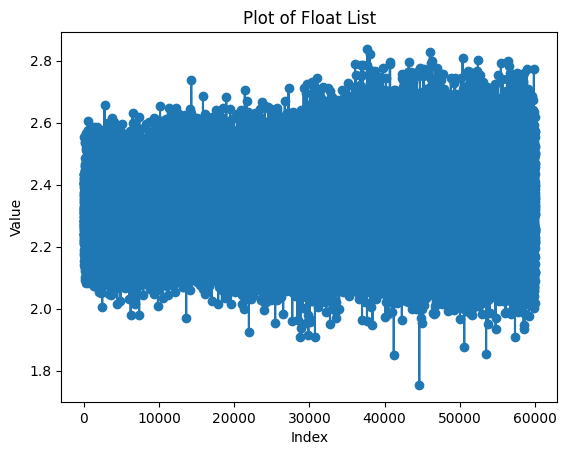

In [4]:
indices = list(range(len(train_loss)))

# 绘制数据
# for i in range(len(loss_lists)):
plt.plot(indices, train_loss, marker='o')

# 添加标题和标签
plt.title('Plot of Float List')
# plt.ylim(0, 4)
plt.xlabel('Index')
plt.ylabel('Value')

# 显示图形
plt.show()
# CROSS SGD

# Evaluation functions

In [ ]:
######################
### from MoCo repo ###
######################
# test using a knn monitor
def test(net, memory_data_loader, test_data_loader, epoch, knn_k, knn_t, record_keeper):
    net.eval()
    classes = len(memory_data_loader.dataset.classes)
    total_top1, total_num, feature_bank = 0.0, 0, []
    with torch.no_grad():
        # generate feature bank
        for data, target in tqdm(memory_data_loader, desc="Feature extracting"):
            feature = net(data.cuda(non_blocking=True))
            feature = torch.nn.functional.normalize(feature, dim=1)
            feature_bank.append(feature)
        # [D, N]
        feature_bank = torch.cat(feature_bank, dim=0).t().contiguous()
        # [N]
        feature_labels = torch.tensor(
            memory_data_loader.dataset.targets, device=feature_bank.device
        )
        # loop test data to predict the label by weighted knn search
        test_bar = tqdm(test_data_loader)
        for data, target in test_bar:
            data, target = data.cuda(non_blocking=True), target.cuda(non_blocking=True)
            feature = net(data)
            feature = torch.nn.functional.normalize(feature, dim=1)

            pred_labels = knn_predict(
                feature, feature_bank, feature_labels, classes, knn_k, knn_t
            )

            total_num += data.size(0)
            total_top1 += (pred_labels[:, 0] == target).float().sum().item()
            acc = total_top1 / total_num * 100
            test_bar.set_description("Test Epoch {}: Acc@1:{:.2f}%".format(epoch, acc))

    record_keeper.update_records(
        {"knn_monitor_accuracy": acc},
        epoch,
        parent_name="accuracy",
    )
    record_keeper.save_records()
    return acc


######################
### from MoCo repo ###
######################
# knn monitor as in InstDisc https://arxiv.org/abs/1805.01978
# implementation follows http://github.com/zhirongw/lemniscate.pytorch and https://github.com/leftthomas/SimCLR
def knn_predict(feature, feature_bank, feature_labels, classes, knn_k, knn_t):
    # compute cos similarity between each feature vector and feature bank ---> [B, N]
    sim_matrix = torch.mm(feature, feature_bank)
    # [B, K]
    sim_weight, sim_indices = sim_matrix.topk(k=knn_k, dim=-1)
    # [B, K]
    sim_labels = torch.gather(
        feature_labels.expand(feature.size(0), -1), dim=-1, index=sim_indices
    )
    sim_weight = (sim_weight / knn_t).exp()

    # counts for each class
    one_hot_label = torch.zeros(
        feature.size(0) * knn_k, classes, device=sim_labels.device
    )
    # [B*K, C]
    one_hot_label = one_hot_label.scatter(
        dim=-1, index=sim_labels.view(-1, 1), value=1.0
    )
    # weighted score ---> [B, C]
    pred_scores = torch.sum(
        one_hot_label.view(feature.size(0), -1, classes) * sim_weight.unsqueeze(dim=-1),
        dim=1,
    )

    pred_labels = pred_scores.argsort(dim=-1, descending=True)
    return pred_labels

# Training and logging functions

In [ ]:
def update_records(loss, loss_fn, optimizer, record_keeper, global_iteration):
    def optimizer_custom_attr_func(opt):
        return {"lr": opt.param_groups[0]["lr"]}

    record_these = [
        [{"loss": loss.item()}, {"parent_name": "loss_histories"}],
        [{"loss_function": loss_fn}, {"recursive_types": [torch.nn.Module]}],
        [{"optimizer": optimizer}, {"custom_attr_func": optimizer_custom_attr_func}],
    ]
    for record, kwargs in record_these:
        record_keeper.update_records(record, global_iteration, **kwargs)


def save_model(encQ):
    model_folder = "example_saved_models"
    if not os.path.exists(model_folder):
        os.makedirs(model_folder)
    torch.save(encQ.state_dict(), "{}/encQ_best.pth".format(model_folder))


######################
### from MoCo repo ###
######################
def batch_shuffle_single_gpu(x):
    """
    Batch shuffle, for making use of BatchNorm.
    """
    # random shuffle index
    idx_shuffle = torch.randperm(x.shape[0]).cuda()

    # index for restoring
    idx_unshuffle = torch.argsort(idx_shuffle)

    return x[idx_shuffle], idx_unshuffle


######################
### from MoCo repo ###
######################
def batch_unshuffle_single_gpu(x, idx_unshuffle):
    """
    Undo batch shuffle.
    """
    return x[idx_unshuffle]


def create_labels(num_pos_pairs, previous_max_label):
    # create labels that indicate what the positive pairs are
    labels = torch.arange(0, num_pos_pairs)
    labels = torch.cat((labels, labels)).to(device)
    # add an offset so that the labels do not overlap with any labels in the memory queue
    labels += previous_max_label + 1
    # we want to enqueue the output of encK, which is the 2nd half of the batch
    enqueue_mask = torch.zeros(len(labels)).bool()
    enqueue_mask[num_pos_pairs:] = True
    return labels, enqueue_mask


def train(
    encQ,
    encK,
    paramK_momentum,
    loss_fn,
    optimizer,
    train_loader,
    record_keeper,
    global_iteration,
):
    encQ.train()
    pbar = tqdm(train_loader)
    for images, _ in pbar:
        previous_max_label = torch.max(loss_fn.label_memory)
        imgQ = images[0].to(device)
        imgK = images[1].to(device)

        # compute output
        encQ_out = encQ(imgQ)
        with torch.no_grad():  # no gradient to keys
            copy_params(encQ, encK, m=paramK_momentum)
            imgK, idx_unshuffle = batch_shuffle_single_gpu(imgK)
            encK_out = encK(imgK)
            encK_out = batch_unshuffle_single_gpu(encK_out, idx_unshuffle)

        all_enc = torch.cat([encQ_out, encK_out], dim=0)
        labels, enqueue_mask = create_labels(encQ_out.size(0), previous_max_label)
        loss = loss_fn(all_enc, labels, enqueue_mask=enqueue_mask)

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pbar.set_description("loss=%.5f" % loss.item())
        update_records(
            loss, loss_fn, optimizer, record_keeper, global_iteration["iter"]
        )
        global_iteration["iter"] += 1

# Start Tensorboard and delete old folders

In [ ]:
!rm -rfv example_logs example_tensorboard example_saved_models
%load_ext tensorboard
%tensorboard --logdir example_tensorboard

# Set parameters and train

In [ ]:
batch_size = 256
lr = 0.03
paramK_momentum = 0.99
memory_size = 4096
num_epochs = 200
knn_k = 200
knn_t = 0.1

(
    train_dataset,
    train_dataset_for_eval,
    val_dataset,
    train_loader,
    train_loader_for_eval,
    val_loader,
) = create_dataset(batch_size)

encQ = create_encoder()
encK = create_encoder()

# copy params from encQ into encK
copy_params(encQ, encK)

optimizer = torch.optim.SGD(encQ.parameters(), lr, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

###########################################################
### Set the loss function and the (optional) miner here ###
###########################################################
loss_fn = losses.CrossBatchMemory(
    loss=losses.NTXentLoss(temperature=0.1), embedding_size=128, memory_size=memory_size
)

dataset_dict = {"train": train_dataset_for_eval, "val": val_dataset}
record_keeper, _, _ = logging_presets.get_record_keeper(
    "example_logs", "example_tensorboard"
)
hooks = logging_presets.get_hook_container(record_keeper)

# first check untrained performance
epoch = 0
best_accuracy = test(
    encQ, train_loader_for_eval, val_loader, epoch, knn_k, knn_t, record_keeper
)

global_iteration = {"iter": 0}
for epoch in range(1, num_epochs + 1):
    logging.info("Starting epoch {}".format(epoch))
    train(
        encQ,
        encK,
        paramK_momentum,
        loss_fn,
        optimizer,
        train_loader,
        record_keeper,
        global_iteration,
    )
    curr_accuracy = test(
        encQ, train_loader_for_eval, val_loader, epoch, knn_k, knn_t, record_keeper
    )
    if curr_accuracy > best_accuracy:
        best_accuracy = curr_accuracy
        save_model(encQ)
    scheduler.step()